# 1. Overview of the dataframe 

In [15]:
import pandas as pd 
from datetime import datetime
from pytz import utc 
import matplotlib.pyplot as plt
data= pd.read_csv("reviews.csv", parse_dates=["Timestamp"])
data.head



<bound method NDFrame.head of                                              Course Name  \
0      The Python Mega Course: Build 10 Real World Ap...   
1      The Python Mega Course: Build 10 Real World Ap...   
2      The Python Mega Course: Build 10 Real World Ap...   
3      The Python Mega Course: Build 10 Real World Ap...   
4      The Python Mega Course: Build 10 Real World Ap...   
...                                                  ...   
44995                 Python for Beginners with Examples   
44996  The Python Mega Course: Build 10 Real World Ap...   
44997  The Python Mega Course: Build 10 Real World Ap...   
44998                 Python for Beginners with Examples   
44999  The Python Mega Course: Build 10 Real World Ap...   

                      Timestamp  Rating Comment  
0     2021-04-02 06:25:52+00:00     4.0     NaN  
1     2021-04-02 05:12:34+00:00     4.0     NaN  
2     2021-04-02 05:11:03+00:00     4.0     NaN  
3     2021-04-02 03:33:24+00:00     5.0     NaN  

## 2. Average rating of courses per day

In [61]:
# add a day column 
data["Day"]= data["Timestamp"].dt.date
day_average=data.groupby(["Day"]).mean()


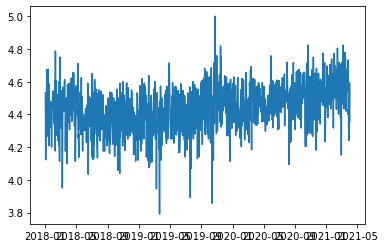

In [23]:
list(day_average.index)
plt.plot(day_average.index, day_average['Rating'])


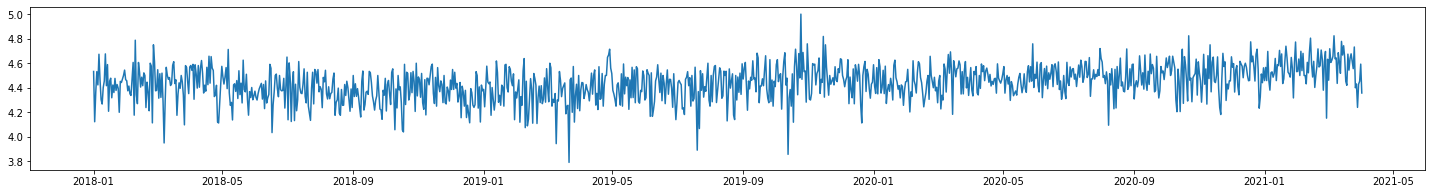

In [20]:
# Add figure object to resize the graph 
plt.figure(figsize=(25, 3))
plt.plot(day_average.index, day_average['Rating'])

# 3. Average rating of courses per week

In [30]:
data["Week"]=data["Timestamp"].dt.strftime("%Y-%U") # week with its year  
data.head()
average_week=data.groupby( ["Week"]).mean()
average_week

,Rating
Week,
2018-00,4.434564
2018-01,4.424933
2018-02,4.417702
2018-03,4.401024
2018-04,4.468085
...,...
2021-09,4.560096
2021-10,4.627315
2021-11,4.629121


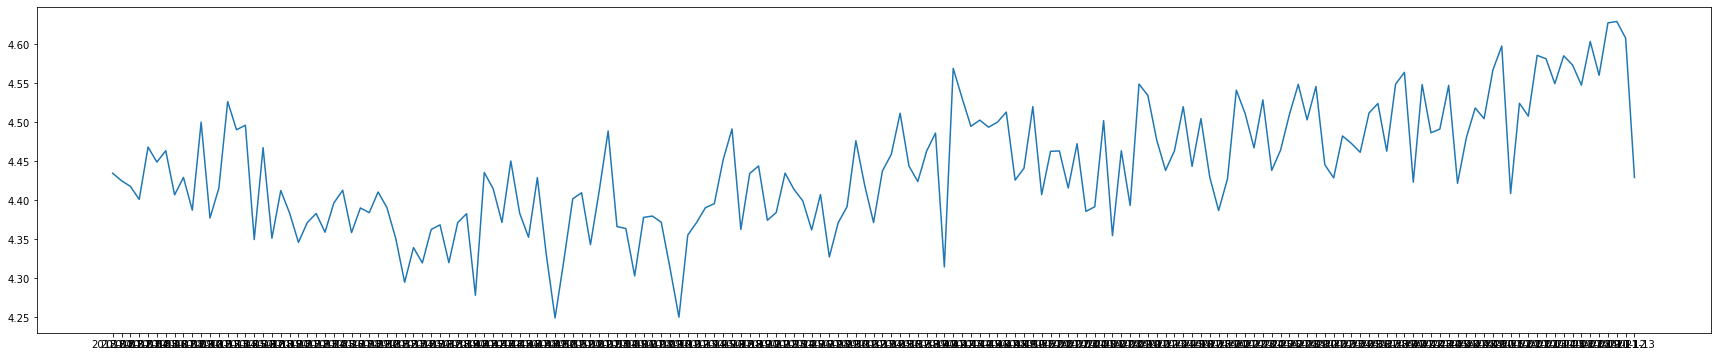

In [32]:
plt.figure(figsize=(30, 6))
plt.plot(average_week.index, average_week["Rating"])

# 4. Average rating per month 

In [39]:
data["Month"]=data["Timestamp"].dt.strftime("%y-%m")
average_month=data.groupby("Month").mean()
average_month

,Rating
Month,
18-01,4.429645
18-02,4.436248
18-03,4.421671
18-04,4.468211
18-05,4.396420
18-06,4.375379
18-07,4.393184
18-08,4.344753
18-09,4.347247


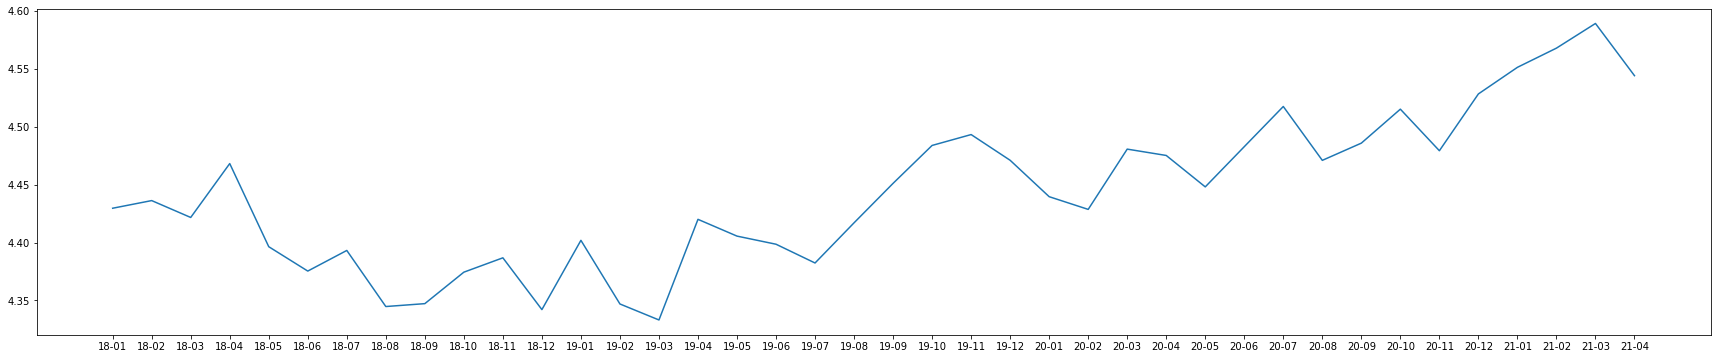

In [53]:
plt.figure(figsize=(30,6))
plt.plot(average_month.index, average_month['Rating'])


# 5. Average rating by course per month 

In [96]:
data["Month"]=data["Timestamp"].dt.strftime("%y-%m")
average_month_course=data.groupby(["Month","Course Name"]).mean()
average_month_course[:20] 
# dataframe with 2 indexes 

(262, 1)

In [99]:
average_month_course=data.groupby(["Month","Course Name"]).mean().unstack()
average_month_course[:20] 
average_month_course.columns


MultiIndex([('Rating', ...),
            ('Rating', ...),
            ('Rating', ...),
            ('Rating', ...),
            ('Rating', ...),
            ('Rating', ...),
            ('Rating', ...),
            ('Rating', ...)],
           names=[None, 'Course Name'])

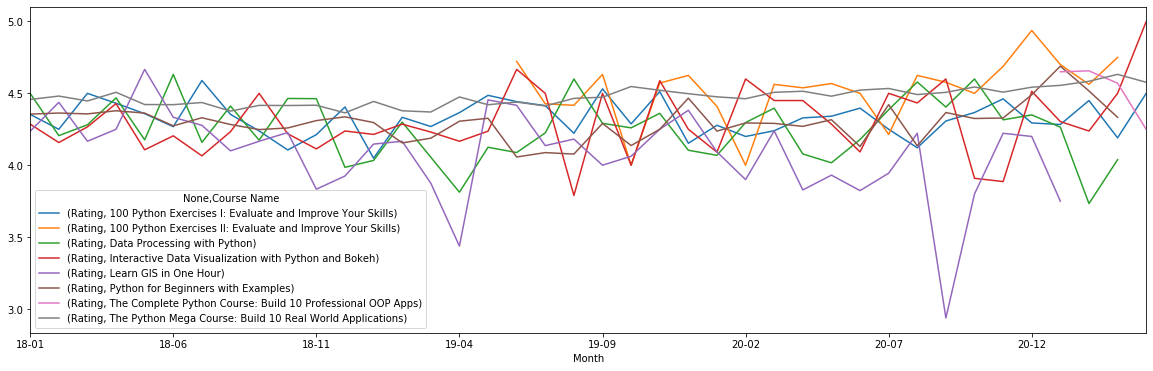

In [56]:

average_month_course.plot(figsize=(20,6))

# 6. Day where people are happiest

In [62]:
data.head


<bound method NDFrame.head of                                              Course Name  \
0      The Python Mega Course: Build 10 Real World Ap...   
1      The Python Mega Course: Build 10 Real World Ap...   
2      The Python Mega Course: Build 10 Real World Ap...   
3      The Python Mega Course: Build 10 Real World Ap...   
4      The Python Mega Course: Build 10 Real World Ap...   
...                                                  ...   
44995                 Python for Beginners with Examples   
44996  The Python Mega Course: Build 10 Real World Ap...   
44997  The Python Mega Course: Build 10 Real World Ap...   
44998                 Python for Beginners with Examples   
44999  The Python Mega Course: Build 10 Real World Ap...   

                      Timestamp  Rating Comment         Day     Week  Month  
0     2021-04-02 06:25:52+00:00     4.0     NaN  2021-04-02  2021-13  21-04  
1     2021-04-02 05:12:34+00:00     4.0     NaN  2021-04-02  2021-13  21-04  
2     2021-04-0

In [85]:
data["Weekday"]=data["Timestamp"].dt.strftime("%A")
data["daynumber"]=data["Timestamp"].dt.strftime("%w")
data
average_weekday=data.groupby(["Weekday", "daynumber"]).mean()
average_weekday=average_weekday.sort_values("daynumber")
average_weekday

,,Rating
Weekday,daynumber,
Sunday,0,4.439097
Monday,1,4.449335
Tuesday,2,4.446240
Wednesday,3,4.427452
Thursday,4,4.437880
Friday,5,4.455207
Saturday,6,4.440274


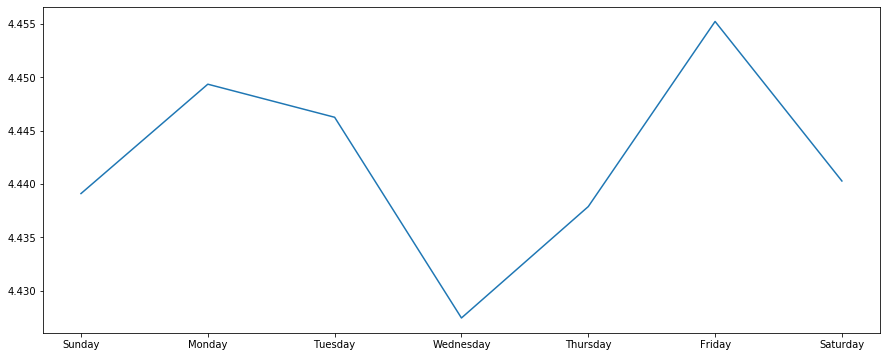

In [81]:
plt.figure(figsize=(15,6))

plt.plot(average_weekday.index.get_level_values(0), average_weekday["Rating"])

 # Number of comments per course

In [103]:
nb_comment=data.groupby("Course Name")["Comment"].count()
list(nb_comment)
nb_comment.index


Index(['100 Python Exercises I: Evaluate and Improve Your Skills',
       '100 Python Exercises II: Evaluate and Improve Your Skills',
       'Data Processing with Python',
       'Interactive Data Visualization with Python and Bokeh',
       'Learn GIS in One Hour', 'Python for Beginners with Examples',
       'The Complete Python Course: Build 10 Professional OOP Apps',
       'The Python Mega Course: Build 10 Real World Applications'],
      dtype='object', name='Course Name')

([<matplotlib.patches.Wedge at 0x7f14e4a92400>,
 [Text(1.0937398607583917, 0.11718838247972499, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0655576685473986, 0.27310594098230845, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0361498579883521, 0.3693148680878117, 'Data Processing with Python'),
  Text(0.9900237515196769, 0.4794298399420976, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9316958821158219, 0.5847587393518978, 'Learn GIS in One Hour'),
  Text(0.6231969497809757, 0.906435635764442, 'Python for Beginners with Examples'),
  Text(0.22633249052605217, 1.076463470691075, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.839336236268724, -0.7109955572900952, 'The Python Mega Course: Build 10 Real World Applications')])

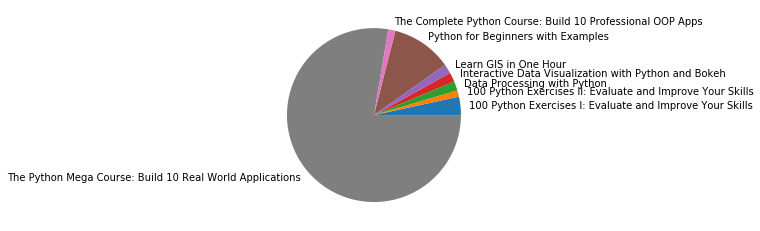

In [108]:
plt.pie(nb_comment, labels=nb_comment.index)